# Supervised Learning: Support Vector Machines: Kernal SVMs

# "kernel trick" to handle nonlinear input spaces

* generalise feature engineering

* simple optimisation problem, by keeping convexity

### Linear SVM: reminder:

$$\min_{w \in \mathbb{R}^p, b \in \mathbf{R}} C \sum_{i=1}^n \max(0, 1 - y_i (w^T\mathbf{x} +b)) + ||w||^2_2$$

### Linear SVM: solution

$$\hat{y} = \text{sign}(w^T \mathbf{x} + b)$$

* via optimisation theory we see that "w":

$$w = \sum_{i=1}^n \alpha_{i}x_{i}$$

i.e. *expressing the linear weights "w" as a linear combination of the data points with "alpha"*

where, $\alpha_{i}$ are called "dual coefficients" (only NON ZERO for Support Vectors, data points which contribute to the solution)

i.e. reduced the number of weights to just the important ones that support the boundary [MAIN difference between SVM and NN]

### re write solution (classification) without "w"

optimisation can be done via either "w" or "alpha"

$$\widehat{y} = sign(w^{T}{x}) = sign\Biggl(\sum_{i}^{n} \alpha_{i}{\Bigl(x_{i}^{T}{x}\Bigr)}\Biggr)$$

"optimisation theory" also => $\alpha_{i}$ is limited by C, i.e. $\alpha_{i} \leq C$, i.e. C limits the amount of influence every data point has on the solution

#### $\phi$ will project data "x" into higher-dimensional space (via e.g polynomials or Gaussian basis functions)

$$\widehat{y} = sign\Biggl(\sum_{i}^{n} \alpha_{i}{\Bigl(\phi (x_{i})^{T}{\phi (x)}\Bigr)}\Biggr)$$

$$k(x_{i}, x_{j}) = \phi (x_{i})^{T}{\phi (x_{j})}$$

**k = kernel function** (= similiarity function)

k behaves like an "inner product", i.e. a measure of similarity between 2 points

Aside: (known) theory: if k is positive definite, symmetric, (quadratic form) then there exists a $\phi$

$k(x_i, x_i) \geq 0$

$k(x_i, x_j) = k(x_j, x_i)$

* $\phi$ = feature function [which in practise is never actually calculated; as easier to engineer the inner products of $k$]

    * e.g. of $\phi$ = polynomial expansion


* Choice of projection $\phi$ ?

    * VIA: kernel transformation:
        * compute a basis function centered at every point in the dataset, and let the SVM algorithm sift through the results
    * PROBLEM: projecting N points into N dimensions => computationally intensive as N grows large
    * SOLUTION: kernel trick => fit on kernel-transformed data can be done implicitly (do NOT build the full N-dimensional representation of the kernel projection)
    
    
    
* Kernal SVM algorithms speed is proportional to the number of support vectors not the number of data points in the training data set (as would be the case for regression)

For linear SVM: $$\hat{y} = \text{sign}(w^T \mathbf{x} + b)$$

For non-linear SVM: alternate feature space: $$\hat{y}' = \text{sign}(w^{T}\phi(x) + b)$$

![](http://i.imgur.com/WuxyO.png)

### Kernals: Examples:

$$k_\text{linear}(\mathbf{x}, \mathbf{x}') = \mathbf{x}^T\mathbf{x}'$$

$$k_\text{poly}(\mathbf{x}, \mathbf{x}') = (\mathbf{x}^T\mathbf{x}' + c) ^ d$$

* popular in image processing

$$k_\text{rbf}(\mathbf{x}, \mathbf{x}') = \exp(\gamma||\mathbf{x} -\mathbf{x}'||^2)$$

* Gaussian function above the curve around the distance of the two data points.

$$k_\text{sigmoid}(\mathbf{x}, \mathbf{x}') = \tanh\left(\gamma \mathbf{x}^T\mathbf{x}'  + r\right)$$

* proxy for neural networks

$$k_\cap(\mathbf{x}, \mathbf{x}')= \sum_{i=1}^p \min(x_i, x'_i)$$

* intersection kernel

NB: can create a new kernel:

if $k$ and $k′$ are kernels, then so are $k + k', kk', ck', ...$

### Kernals: Example: $k_\text{poly}(\mathbf{x}, \mathbf{x}') = (\mathbf{x}^T\mathbf{x}' + c) ^ d$

polynomials: (primal) compute: n_samples * n_features ^ d [i.e. an explicit expansion]

**kernel trick**: (dual optimisation) compute: n_samples * n_samples [i.e. the inner product on the training data]

**i.e. less compute if large number of features and dimensions**

e.g. for a single feature,

consider, $\phi = (x^2, \sqrt{2}x, 1)^T (x'^2, \sqrt{2}x', 1) $ = inner product of features 

= $x^2x'^2 + 2xx' + 1 = (xx' + 1)^2$

The point of this is to show, if we want polynomials of high degrees, i.e. d increases, thus $\phi$ grows in compute, whilst the $k$ stays compact

#### Example: polynomial kernal vs explicit polynomial features

In [1]:
from sklearn.datasets import make_blobs

#### dataset consisting of classes orange and blue 

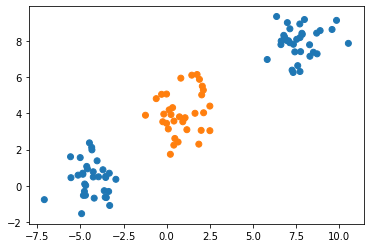

In [2]:
X, y = make_blobs(random_state=3)
import numpy as np
y = (y == 0).astype(np.int)
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X[:, 0], X[:, 1], c=plt.cm.tab10(y))

### not linearly separable => cannot be solved with a linear SVM

In [3]:
print(X.shape)
print(y.shape)

(100, 2)
(100,)


In [4]:
from sklearn.svm import SVC

#### explicit polynomial features

* polynomial transformation from two features to five features

* sklearn.preprocessing.PolynomialFeatures(degree=2, interaction_only=False, ...)

    * Generate polynomial, i.e. a new feature matrix 
        * e.g. input sample = 2D = [a, b]
            * => degree-2 polynomial features = [1, a, b, a^2, ab, b^2]
                * as d increases, **$\phi$ grows in compute**, whilst the $k$ stays compact

In [5]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(include_bias=False)
X_poly = poly.fit_transform(X)

print(X.shape)
print(X_poly.shape)
print(poly.get_feature_names())

(100, 2)
(100, 5)
['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2']


* learn linear SVM on this expanded features space
    * fitting a linear model in a transformed space, corresponds to fitting a nonlinear model in the original space

In [6]:
linear_svm = SVC(kernel="linear").fit(X_poly, y)

#### poly kernels

* via original data set with polynomial kernel of degree 2

$(\gamma \langle x, x'\rangle + r)^d$
 
* $d$ is set by "degree" in SVC()
* $r$ is set by "coef0" in SVC()

    * as d increases, $\phi$ grows in compute, whilst the **$k$ stays compact**

In [7]:
poly_svm = SVC(kernel="poly", degree=2, coef0=1).fit(X, y)

C:\Users\KUNAL\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


#### overall similar solutions

In [8]:
# create a grid for plotting decision functions...
x_lin = np.linspace(X[:, 0].min() - .5, X[:, 0].max() + .5, 1000)
y_lin = np.linspace(X[:, 1].min() - .5, X[:, 1].max() + .5, 1000)
x_grid, y_grid = np.meshgrid(x_lin, y_lin)
X_grid = np.c_[x_grid.ravel(), y_grid.ravel()]

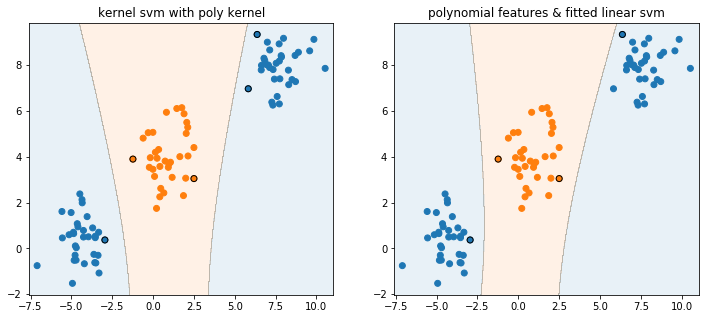

In [9]:
from sklearn.pipeline import make_pipeline
colors = [plt.cm.tab10(0), plt.cm.tab10(0), plt.cm.tab10(1), plt.cm.tab10(1)]
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for ax, model, name in zip(
    axes, 
    [poly_svm, make_pipeline(poly, linear_svm)],
    ["kernel svm with poly kernel", "polynomial features & fitted linear svm"]):
    
    ax.set_title(name)
    support_vectors = getattr(model, "support_", None)
    
    if support_vectors is None:
        support_vectors = model.steps[1][1].support_
        
    predictions = model.predict(X_grid)
    ax.contourf(x_grid, y_grid, predictions.reshape(x_grid.shape), alpha=.1, colors=colors)
    ax.scatter(X[:, 0], X[:, 1], c=plt.cm.tab10(y))
    
    # circled the support vectors
    ax.scatter(X[support_vectors, 0], X[support_vectors, 1], facecolor='none', edgecolor='k', linewidths=1)
    # worth noting one support vector is different between the two plots
    
    ax.set_xlim(x_lin[0], x_lin[-1])
    ax.set_ylim(y_lin[0], y_lin[-1])
    
plt.savefig("images/poly_kernel_features.png")

# coefficients

##### explicit polynomial features

In [10]:
print(X.shape)
print(X_poly.shape)
print(poly.get_feature_names())

(100, 2)
(100, 5)
['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2']


In [11]:
print(linear_svm.coef_)

[[ 0.13850605  0.05989699 -0.20119627  0.0484241   0.01907115]]


* predicition function of explicit polynomial feature function: "primal"

$y = \text{sign}(0.139 x_0 + 0.06 x_1 - 0.201 x_0^2 + 0.048 x_0 x_1 + 0.019 x_1^2)$

In [12]:
print(linear_svm.dual_coef_) # "alphas"
print(linear_svm.support_) # circled in the plot above

[[-0.02957404 -0.00341814  0.00254448  0.03044769]]
[ 1 26 42 62]


* prediction function of kernal svm

$y = \text{sign}(-0.03 \phi(\mathbf{x}_1)^T \phi(x) - 0.003 \phi(\mathbf{x}_{26})^T \phi(\mathbf{x})  +0.003 \phi(\mathbf{x}_{42})^T \phi(\mathbf{x}) + 0.03 \phi(\mathbf{x}_{62})^T \phi(\mathbf{x}))$

##### poly kernels

In [13]:
# no coefficients in the original space i.e. no "w"
print(poly_svm.dual_coef_)
print(poly_svm.support_) # circled in the plot above

[[-0.05694295 -0.00039178 -0.01200193  0.00760712  0.06172954]]
[ 1 26 41 42 62]


* prediction function of the kernel support vector machine i.e. uses inner products by the kernels: "dual optimisation"

$y = \text{sign}(-0.057 (\mathbf{x}_1^T\mathbf{x} + 1)^2
         -0.012 (\mathbf{x}_{41}^T \mathbf{x} + 1)^2
         +0.008 (\mathbf{x}_{42}^T \mathbf{x} + 1)^2
         + 0.062 * (\mathbf{x}_{62}, \mathbf{x} + 1)^2)$
         
* computing this is faster

* not very interpretable, based on support vectors from training sample

## What is/are true about kernel in SVM?

1. Kernel function map low dimensional data to high dimensional space
2. It’s a similarity function


* A) 1
* B) 2
* C) 1 and 2
* D) None of these

# Runtime Considerations

In [14]:
from time import time
from sklearn.svm import LinearSVC

linear, kernel = [], []
samples = [100, 1000, 10000, 100000]
for n_samples in samples:
    X, y = make_blobs(n_samples=int(n_samples))#, random_state=0)
    y = (y == 0).astype(np.int)
    X_poly = PolynomialFeatures(include_bias=False).fit_transform(X)

    tick = time()
    LinearSVC(dual=False).fit(X_poly, y)
    linear.append(time() - tick)
    tick = time()
    SVC(kernel="poly", degree=2, coef0=1).fit(X, y)
    kernel.append(time() - tick)

C:\Users\KUNAL\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\KUNAL\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\KUNAL\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\KUNAL\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

Text(0.5, 0.98, 'Runtime plot in linear space and log-log space')

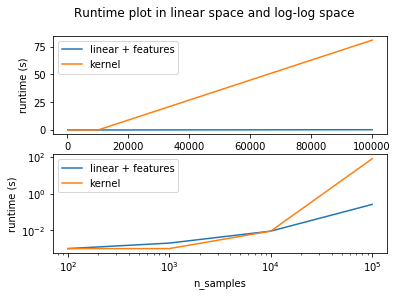

In [15]:
fig, axes = plt.subplots(2, 1)
for ax in axes:
    ax.plot(samples, linear, label="linear + features")
    ax.plot(samples, kernel, label="kernel")
    ax.set_ylabel("runtime (s)")
    ax.set_xlabel("n_samples")
    ax.legend()
axes[1].set_xscale("log")
axes[1].set_yscale("log")

fig.suptitle('Runtime plot in linear space and log-log space', fontsize=12)

* small number of samples => linear kernel and doing explicit polynomials is slower than doing the kernel
* lot of features => explicit expansion is faster (number of samples is large)
* if we have a lot of samples & can do explicit feature expansion => maybe faster.

### inner products are distances => scaling required !!

* StandardScaler 
* MinMaxScaler

NB: default parameters in sklearn algorithms work well for scaled data.

* Choice of projection $\phi$ ?

    * VIA: kernel transformation:
        * compute a basis function centered at every point in the dataset, and let the SVM algorithm sift through the results
    * PROBLEM: projecting N points into N dimensions => computationally intensive as N grows large
    * SOLUTION: kernel trick => fit on kernel-transformed data can be done implicitly (do NOT build the full N-dimensional representation of the kernel projection)

EXTRA...

### binary classification using non-linear SVC with RBF kernel

* target to predict is a XOR of the inputs.

C:\Users\KUNAL\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


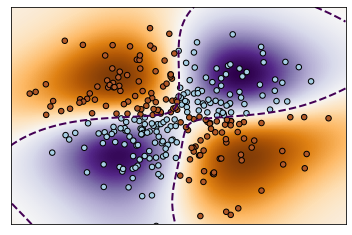

In [16]:
# ref: https://scikit-learn.org/stable/auto_examples/svm/plot_svm_nonlinear.html

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

xx, yy = np.meshgrid(np.linspace(-3, 3, 500),
                     np.linspace(-3, 3, 500))
np.random.seed(0)
X = np.random.randn(300, 2)
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

# fit the model
clf = svm.SVC(kernel = "rbf")
clf.fit(X, Y)

# plot the decision function for each datapoint on the grid
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
           origin='lower', cmap=plt.cm.PuOr_r)
contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2,
                       linestyles='dashed')
plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired,
            edgecolors='k')
plt.xticks(())
plt.yticks(())
plt.axis([-3, 3, -3, 3])
plt.show()

In [17]:
* The color map illustrates the decision function learned by the SVC

SyntaxError: invalid syntax (<ipython-input-17-7384c84d62e6>, line 1)